In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
X = data.iloc[:,0:-1]
y = data.iloc[:,4]

In [17]:
states = pd.get_dummies(X['State'], drop_first=True)

In [18]:
X = X.drop(columns = 'State', axis=1)

In [19]:
X = pd.concat([X, states], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9347068473282423

In [52]:
compare = pd.DataFrame({'Y Test': y_test, 'Y Predicted': y_pred})

In [48]:
ser = np.arange(1,len(compare)+1)

In [50]:
compare = pd.concat([compare,pd.Series(ser)], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


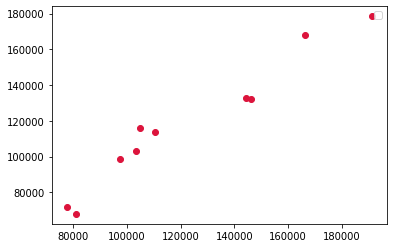

In [55]:
plt.scatter( y_test, y_pred,c='crimson')
#plt.scatter(X_test, y_pred, c= 'crimson', label= 'Y Predicted')
plt.legend()
plt.show()
